
**Created by Sanskar Hasija**

**Keras-OCR VS EasyOCR VS PYTESSERACT**

**24 August 2021**


# <center> Keras-OCR VS EasyOCR VS PYTESSERACT </center>

### [1. KERAS-OCR](#kerasocr) ###
### [2. EASYOCR](#easyocr) ###
### [3. PYTESSERACT](#pytesseract) ###
##    [Conclusions](#conclusions) ##

## Installing Keras-ocr

In [1]:
from IPython.display import clear_output
!pip install keras-ocr
clear_output()

## IMPORTS

In [2]:
import pytesseract
import keras_ocr
import easyocr
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## TEST IMAGES

In [3]:
url = [
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image1.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image2.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image3.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image4.png"
]
images = [ keras_ocr.tools.read(i) for i in url]

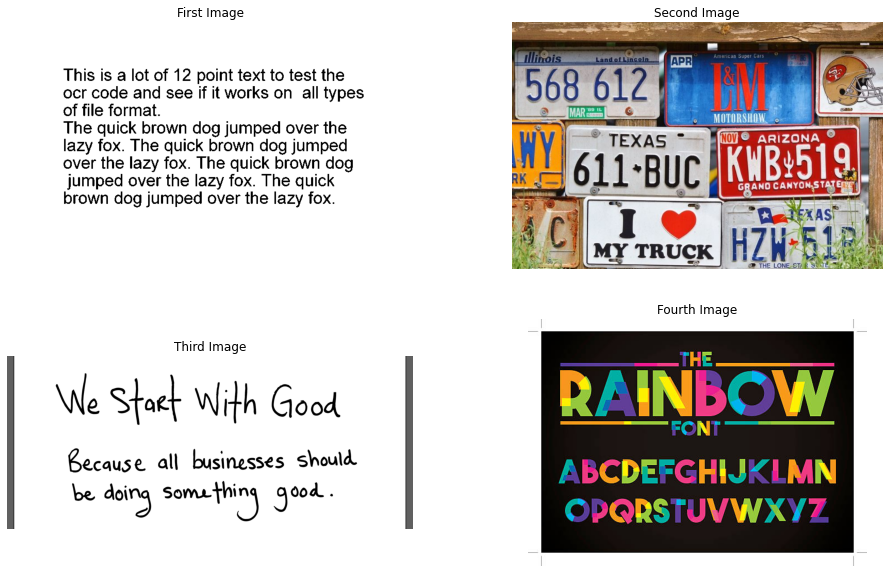

In [4]:
fig = plt.figure(figsize=(16,10))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(images[0])
plt.axis('off')
plt.title("First Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(images[1])
plt.axis('off')
plt.title("Second Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(images[2])
plt.axis('off')
plt.title("Third Image")

fig.add_subplot(rows, columns, 4)
plt.imshow(images[3])
plt.axis('off')
plt.title("Fourth Image");

<a id="kerasocr"></a>
# KERAS_OCR

In [5]:
pipline = keras_ocr.pipeline.Pipeline() #Creting a pipline 
kerasocr_preds = pipline.recognize(images)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


### Keras-ocr plots boxes of detected text with annotations on the input image.

## Results of Keras-OCR

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


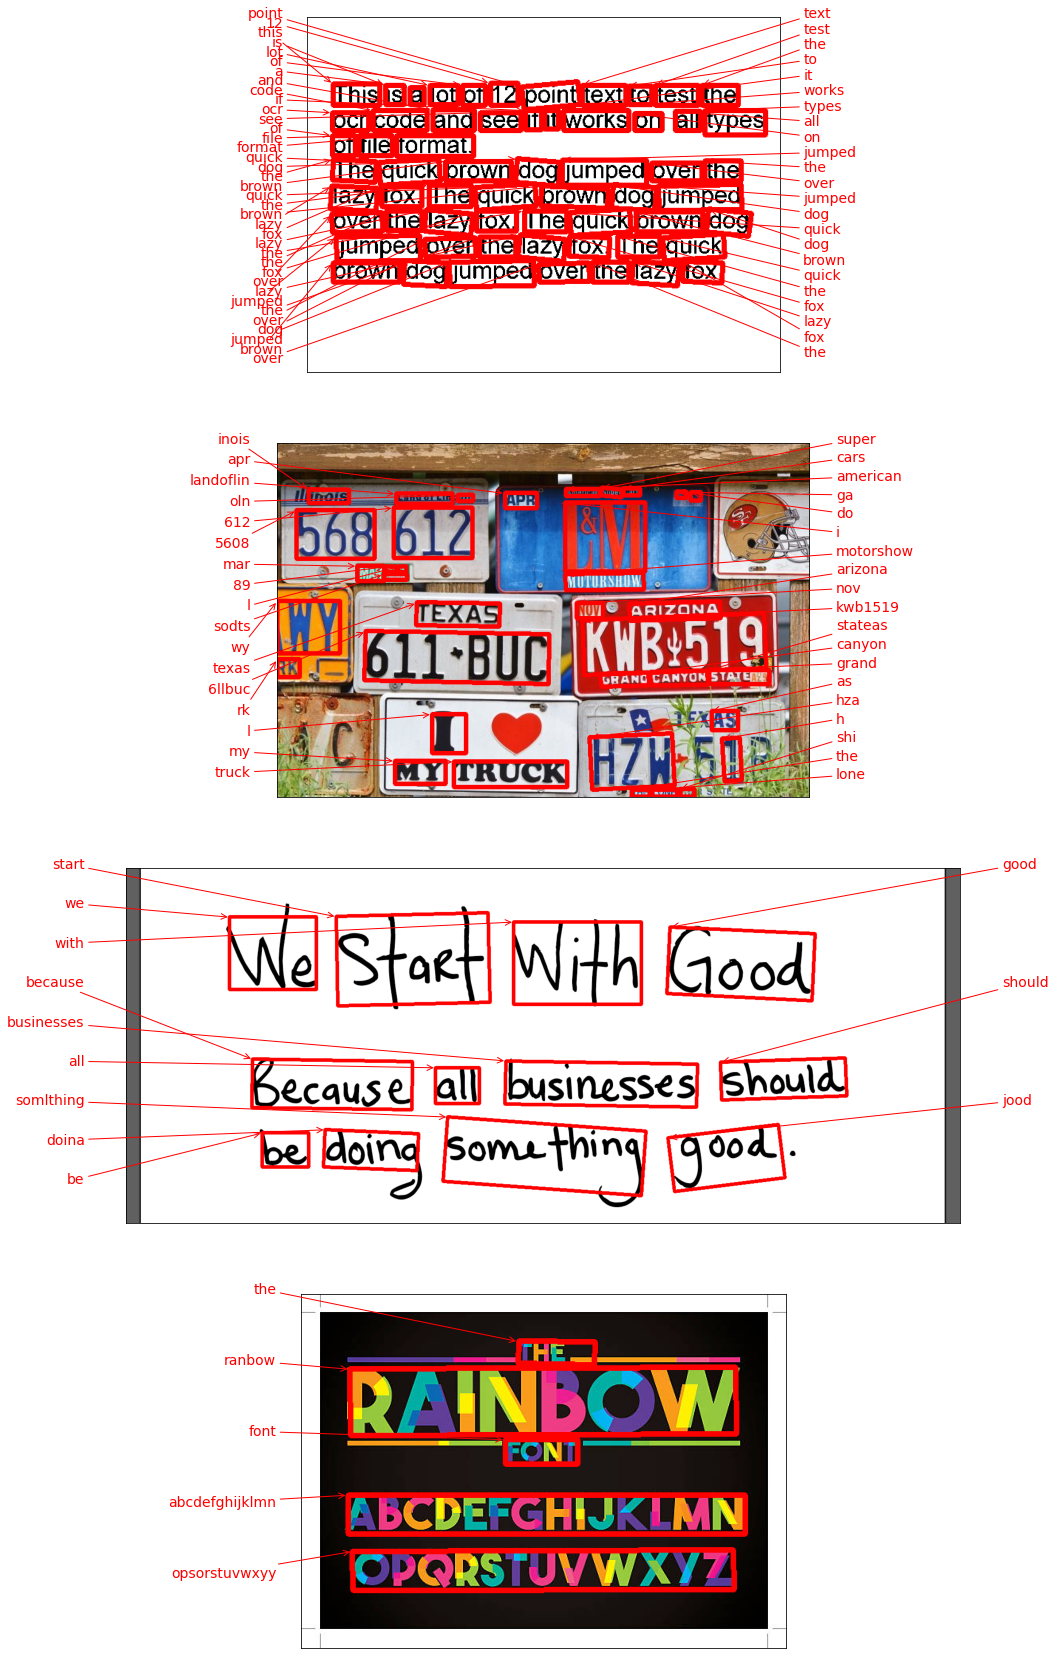

In [6]:
fig,axs = plt.subplots(nrows = 4 , figsize = (30,30))
for ax , image,  prediction in zip(axs , images , kerasocr_preds):
    keras_ocr.tools.drawAnnotations(image, prediction, ax)

<a id="easyocr"></a>
# EASYOCR

In [7]:
text_reader = easyocr.Reader(['en']) #Initialzing the ocr

## Results of EASY OCR

### First Image

This is a lot of 12 point text to test the
ocr code and see if it works on
all types
of file format:
The quick brown dog jumped over the
lazy fox The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


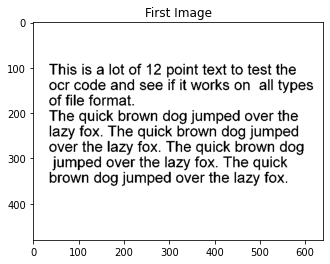

In [8]:
results = text_reader.readtext(images[0] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[0])
plt.title("First Image");

### Second Image

Iigis
LandehLincoln 
American Super Cars
APR
568 612
DM
'B9rIL
MAR
Wenn
MOTORSHOW
TEXAS
no
ARizONA
MY
RK
611*BUC |KLB 519]
GPANOCANYON staten
KAS
MY TRUCK
HZI
THE LONE SH


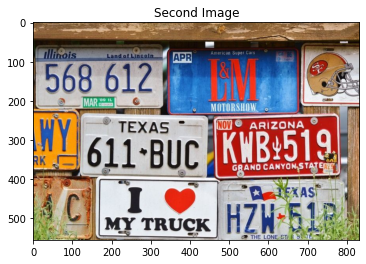

In [9]:
results = text_reader.readtext(images[1] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[1])
plt.title("Second Image");

### Third Image

We Sfart Wifh Good
Because
all
businesses
should
be
doinq
somathin)
9od


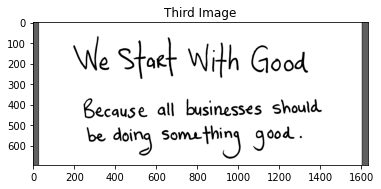

In [10]:
results = text_reader.readtext(images[2] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[2])
plt.title("Third Image");

### Fourth Image

THE
RANBOW
FONT
ABCDEFGHIJKLMN
OPQRSTUVWXYZ


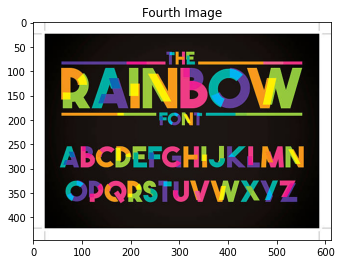

In [11]:
results = text_reader.readtext(images[3] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[3])
plt.title("Fourth Image");

<a id="pytesseract"></a>
# Pytesseract

In [12]:
tesseract_preds = []
for img in images:
    tesseract_preds.append(pytesseract.image_to_string(img))

##  Results of Pytesseract

### Image 1 

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



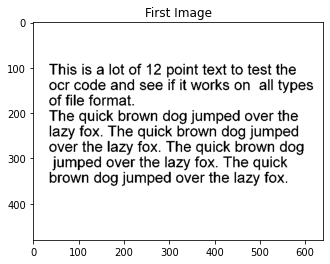

In [13]:
print(tesseract_preds[0])
plt.imshow(images[0])
plt.title("First Image");

### Image 2

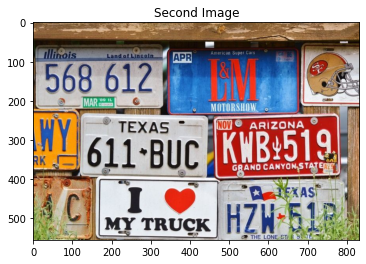

In [14]:
print(tesseract_preds[1])
plt.imshow(images[1])
plt.title("Second Image");

## Image 3

\Ne Staet With Good

Because all businesses should
be doing Soma thing good.



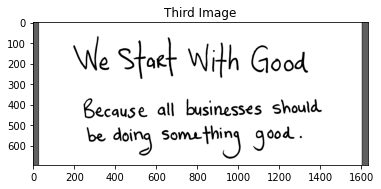

In [15]:
print(tesseract_preds[2])
plt.imshow(images[2])
plt.title("Third Image");

## Image 4

ABCDEFGHIJKLM
OPQRSTUVWKXYZ

 



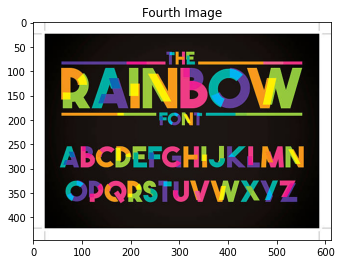

In [16]:
print(tesseract_preds[3])
plt.imshow(images[3])
plt.title("Fourth Image");

<a id="conclusions"></a>
# CONCLUSIONS

### * Keras-OCR is image specific OCR tool. If text is inside the image and their fonts and colors are unorganized, Keras-ocr consumes time if used on CPU
### * EasyOCR is lightweight model which is giving a good performance for receipt or PDF conversion. It is giving more accurate results with organized texts like pdf files, receipts, bills. EasyOCR also performs well on noisy images
### * Pytesseract is performing well for high-resolution images. Certain morphological operations such as dilation, erosion, OTSU binarization can help increase pytesseract performance. It also provides better results on handwritten text as compared to EasyOCR
### * All these results can be further improved by performing specific image operations.

# <center>If you find this notebook useful, support with an upvote!</center>